<a href="https://colab.research.google.com/github/kkimyunjoo/24-2-ESAA/blob/main/1108_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 딥러닝 텐서플로 Ch 3. 1~3**

p.50-86

## **Part 03. 케라스 (Keras)**


### **01. 딥러닝 준비**

1-1 주요 용어

1. 하이퍼파라미터 : 사용자가 직접 설정해야하는 값
2. 과소적합(underfitting) vs 과대적합(overfitting)
  - 과소적합: 모델이 충분히 학습되지 않아 예측 성능이 떨어진 상태
  - 과대 적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태
3. 에포크: 모델 반복 훈련 시 데이터셋이 전부 학습에 사용되는 1회의 루프
  - 과소적합: 에포크 늘려서 다시 학습시키기
  - 과대적합: 에포크 줄여서 최적 구간에서 학습 종료
4. 손실함수: 예측 값과 정답 값의 차이 또는 오차(Error)
  - 이진 분류: binary_crossentropy 손실함수 사용
  - 다중 분류
    - 원핫 벡터인 경우 :: categorical_crossentropy 손실함수
    - 레이블 값인 경우 : sparse_categorical_crossentropy 손실함수
    - 출력층의 활성화 함수 : softmax


In [ ]:
# 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사용
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

  5. 경사하강법: 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

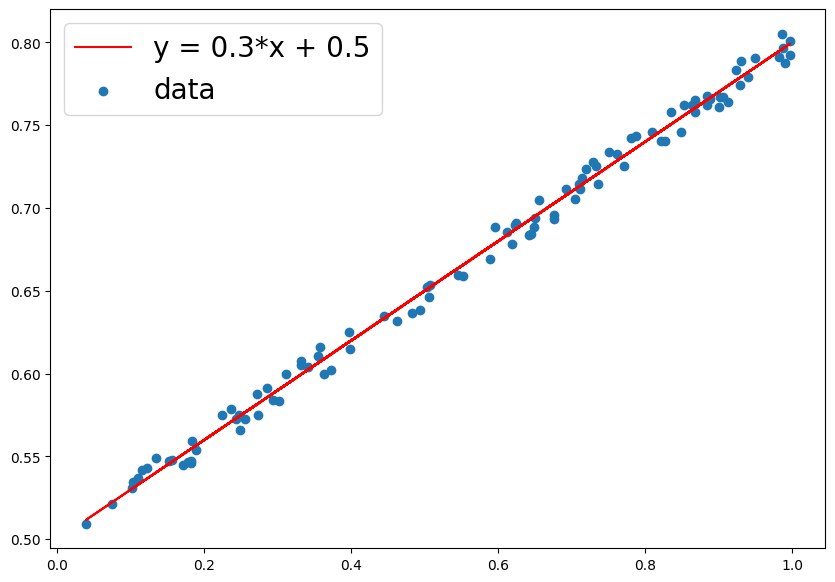

w:0.3, b:0.5


In [ ]:
# 단순 선형회귀 수식(y=wx+b)이 주어졌을 때, 손실함수를 최소로 하는 w와 b를 구하는 과정을 경사하강법으로 구현
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y + noise
  plt.figure(figsize = (10,7))
  plt.plot(x, y, color = 'r', label = f'y = {w}*x + {b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x, y = make_linear(w = 0.3, b = 0.5, size = 100, noise = 0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.33923, b = 0.50987 error = 0.51177
------------------------------------------------------------
 3 w = 0.3, b = 0.5 error = 0.00489


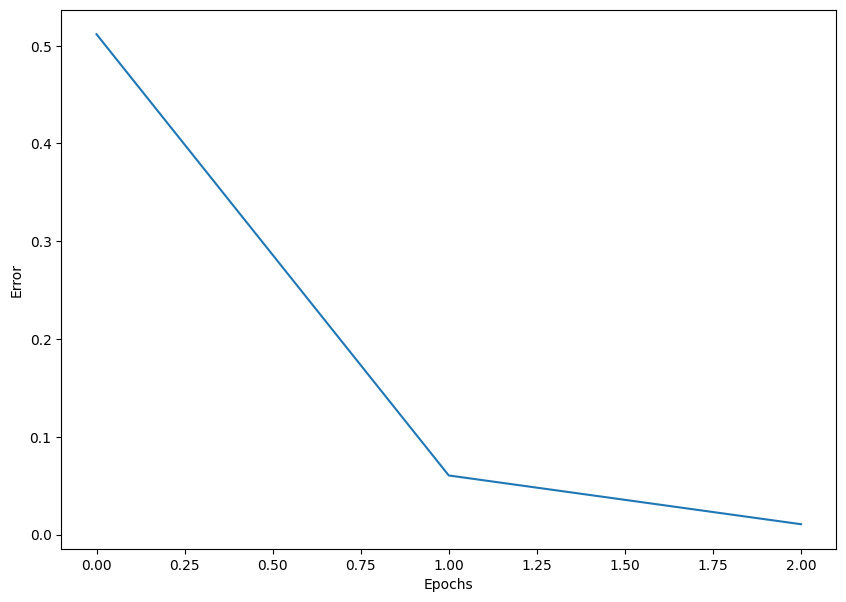

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

1-2 딥러닝 프로세스

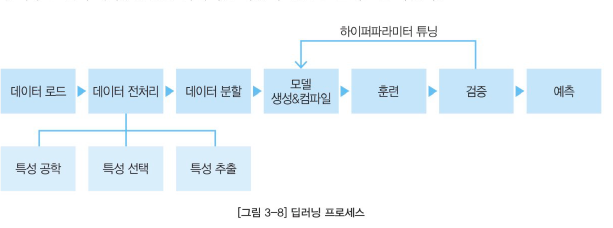

- 데이터 로드
- 데이터 전처리
  - 특성 공학
  - 특성 선택
  - 특성 추출
- 데이터 분할
- 모델 생성 & 컴파일: 손실함수, 옵티마이저, 평가지표 등 정의함.
- 훈련
- 검증: 하이퍼 파라미터 튜닝 -> 모델 생성 & 컴파일
- 예측

### **02. 단순 신경망 훈련**

2-1 선형회귀
- 단순선형회귀 모형: 하나의 X가 Y에 미치는 영향 추정
- Y = wX + b
  - X: 독립변수 Y: 종속변수 w: 가중치 b: 편향

2-1 뉴런
- 뉴런: node라고도 불리며, 인공 신경망 모델을 구성하는 하나의 신경을 의미함.
- 신경망: 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨.
- 뉴런의 내부에는 가중치가 존재하며, 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨.

2-3. Dense 레이어
- 심층 신경망 모델을 구성하는 가장 기본 레이어

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

<Dense name=dense_1, built=False>

2-4 데이터셋 만들기

In [ ]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


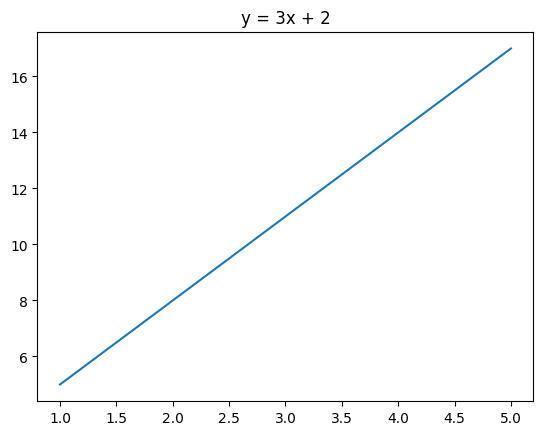

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

2-5 Sequential API
- Sequential API 방식 : 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
- 케라스의 Sequential API를 사용하면 매우 간결하게 딥러닝 모델을 만들 수 있음.
- 2개 이상의 입력(다중 입력)이나 2개 이상의 출력(다중 출력)을 갖는 복잡한 구조를 만들 수 없어 이런 경우  Functional API를 사용해야 함.

  2-5-1 모델구조
  - Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력
  - 대괄호 안에 쉼표로 구분하여 층 쌓기
  - add() : 레이어 추가

  2-5-2 입력 데이터 형태
  - 첫번째 층은 반드시 input_shape 매개변수를 지정해야 함.
     - input_shape : 데이터셋의 shape를 tuple 또는 list로 지정할 수 있음.

  2-5-3 단순 선형 회귀 모델 정의
  - 1개의 뉴런을 가지는 Dense layer를 한 개 사용
    - input_layer : [1]로 지정
  - 1개의 뉴런을 가지는 Dense layer는 1개의 출력값을 가지므로 출력값은 y에 대한 모델의 예측값
  

In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
])

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape = (150, 4)인 경우
  tf.keras.layers.Dense(10, input_shape = [4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

2-6 모델 요약
- Total params : 모델 내부에 존재하는 모든 파라미터의 합계
- Trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수
- Non-trainable params : 모델 훈련 시 업데이트하지 않을 파라미터의 총 개수

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

2-7 컴파일
- 모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 평가지표(metric) 등을 정의함.
  - 클래스 인스턴스: 하이퍼 파라미터를 사용자가 직접 지정할 수 있음.
  - 함수
  - 사전에 정의된 정의열

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

- optimizer: sgd(확률적 경사 하강법)
- 손실 함수: mse
- 평가 지표: mae

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

2-8 훈련
- 생성된 모델 인스턴스에 fit() 함수로 훈련
  - fit() : 입력(x), 출력(y), epoch 수 지정
- 매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표 출력
- validation_data 지정했을 경우 검증 셋에 대한 손실과 평가 지표도 함께 출력함.

In [ ]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - loss: 71.5957 - mae: 7.9783
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 41.8576 - mae: 6.1435
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 24.5267 - mae: 4.7427
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 14.4263 - mae: 3.6731
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.5394 - mae: 2.8565


In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs = 1200)

Epoch 1/1200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - loss: 37.6865 - mae: 5.8627
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 22.1359 - mae: 4.5356
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.0726 - mae: 3.5224
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.7898 - mae: 2.7487
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4.7100 - mae: 2.1579
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2.9142 - mae: 1.7066
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.8665 - mae: 1.3620
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.2548 - mae: 1.0987
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8972 - mae: 0.8975
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6877 - mae: 0.7437
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5645 - mae: 0.6261
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4916 - mae: 0.5773
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms

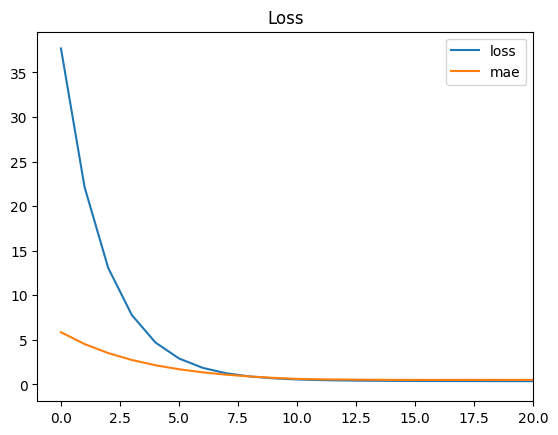

In [21]:
# history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

2-9 검증
- evaluate() 를 통해 성능 검증

In [22]:
# 검증
model.evaluate(x, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 1.2514e-04 - mae: 0.0096


[0.00012514462287072092, 0.009601974859833717]

2-10 예측
- predict() 에 새로운 입력 데이터 넣기

In [25]:
# 예측
model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[32.04641]], dtype=float32)

### **03. 심층 신경망으로 이미지 분류**

3-1 케라스 내장 데이터셋 로드
- boston_housing : 보스톤 주택 가격 데이터셋 (회귀)
- cifar10 : CIFAR10 이미지 분류 데이터셋 (분류)
- cifar100 : CIFAR100 이미지 분류 데이터셋 (분류)
- mnist : mnist 손글씨 데이터셋 (분류)
- fashion_mnist : 의류 데이터셋 (분류)
- imdb : IMDB 영화 데이터셋 (분류)
- reuters : Reuters 뉴스 토픽 (분류)

In [26]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [27]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
# 로드된 데이터셋 확인
print('train set : ', x_train.shape, y_train.shape)
print('test set : ', x_test.shape, y_test.shape)

train set :  (60000, 28, 28) (60000,)
test set :  (10000, 28, 28) (10000,)


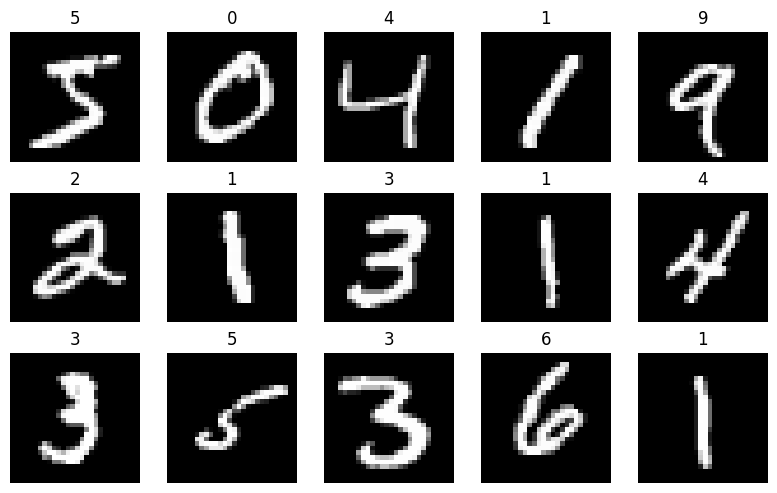

In [29]:
#데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]

  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

3-2 데이터 전처리
- 기존 데이터: 0~255 -> 255로 나누어 0과 1사이의 값으로 정규화
  - 정규화하여 학습하면 경사 하강법 알고리즘에 의한 수렴 속도가 더 빨라짐.
  - local optimum 에 빠지는 현상 방지

In [30]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [31]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최대값 : 255
정규화 후] 최소값 : 0.0, 최대값 : 1.0


In [32]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [33]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

3-3 Flatten 레이어
- 정규화를 하면 개별 데이터의 범위는 축소, 원본 배열의 형태는 그대로 유지
- Dense 레이어 입력값: 1차원만 넣을 수 있음. -> 1차원으로 전처리

In [34]:
#reshape 사용
print(f'변경 전 shape : {x_train.shape}')
print(f'1D으로 shape 변경 후 : {x_train.reshape(60000, -1).shape}')

변경 전 shape : (60000, 28, 28)
1D으로 shape 변경 후 : (60000, 784)


In [35]:
#Flatten 레이어를 사용
print(f'변경 전 shape : {x_train.shape}')
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape : (60000, 28, 28)
Flatten 적용 후 : (60000, 784)


3-4 활성화 함수
- 입력을 비선형 출력으로 변환해주는 함수
- 선형관계를 나타내는 함수에 비선형성을 추가하는 방식
- Sigmoid, Hyperbolic Tangent, ReLU, Leaky ReLU

In [37]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_13, built=False>

In [38]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

3-5 입력과 출력
- 첫 번째 레이어에 입력 데이터의 형태를 나타내는 input_shape 매개변수 지정하는 것이 일반적
- 가장 마지막 레이어인 출력층: 분류해야할 클래스의 개수와 동일하게 지정해야함.

In [39]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation = 'sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation = 'softmax')

<Dense name=dense_20, built=False>

3-6 손실함수
- 이진 분류기
    - 출력층의 노드 개수: 1개
      - activation = 'sigmoid'
      - loss = 'binary_crossentropy'
    - 출력층의 노드 개수: 2개 이상
      - activation = 'softmax'
      - loss
        - y가 원핫 벡터인 경우 : 'categorical_crossentropy'
        - y가 원핫 벡터가 아닌 경우 : 'sparse_categorical_crossentropy'

In [41]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss = 'binary_crossentropy')

In [42]:
# y가 원핫 벡터인 경우
model.compile(loss = 'categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
model.compile(loss = 'sparse_categorical_crossentropy')

3-7 옵티마이저
- 손실을 낮추기 위해서 신경망의 가중치와 학습률이 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법
- Adam 많이 사용함.

In [44]:
# 클래스 인스턴스로 지정
# 클래스 인스턴스로 지정하는 경우 학습률(lr)과 같은 파라미터를 직접 설정할 수 있다.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

3-8 평가지표
- 분류 모델 평가지표: accuracy, auc, precision, recall
- 리스트 형태로 하나 이상의 평가지표 지정 가

In [45]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [46]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

3-9 훈련


In [47]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8746 - loss: 0.4137 - val_accuracy: 0.9604 - val_loss: 0.1268
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9701 - loss: 0.0958 - val_accuracy: 0.9688 - val_loss: 0.0959
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9810 - loss: 0.0625 - val_accuracy: 0.9741 - val_loss: 0.0776
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9858 - loss: 0.0459 - val_accuracy: 0.9755 - val_loss: 0.0816
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9884 - loss: 0.0361 - val_accuracy: 0.9750 - val_loss: 0.0830
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9716 - val_loss: 0.1050
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9907 - loss: 0.0274 - val_accuracy: 0.9790 - val_loss: 0.0744
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9937 - loss: 0.

3-10 평가
- evaluate() : compile 단계에서 지정한 손실(loss function)과 정확도(accuracy)를 순서대로 반환함.

In [48]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도 : ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.1104
검증 셋 정확도 :  0.9807999730110168


3-11 예측
- predict() 메소드에 새로운 이미지(데이터)를 넣어주면 예측 결과를 반환함.

In [49]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
# 첫 번째 데이터에 대한 분류 예측 결과 출력
predictions[0]

array([2.9526420e-10, 4.0229966e-09, 3.0752936e-08, 3.1920729e-07,
       1.4471459e-08, 2.0734026e-09, 2.5117252e-15, 9.9999899e-01,
       4.0994572e-09, 6.4282955e-07], dtype=float32)

- numpy의 argmax를 활용하여 가장 높은 확률값을 가지는 클래스를 확인할 수 있음.

In [51]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


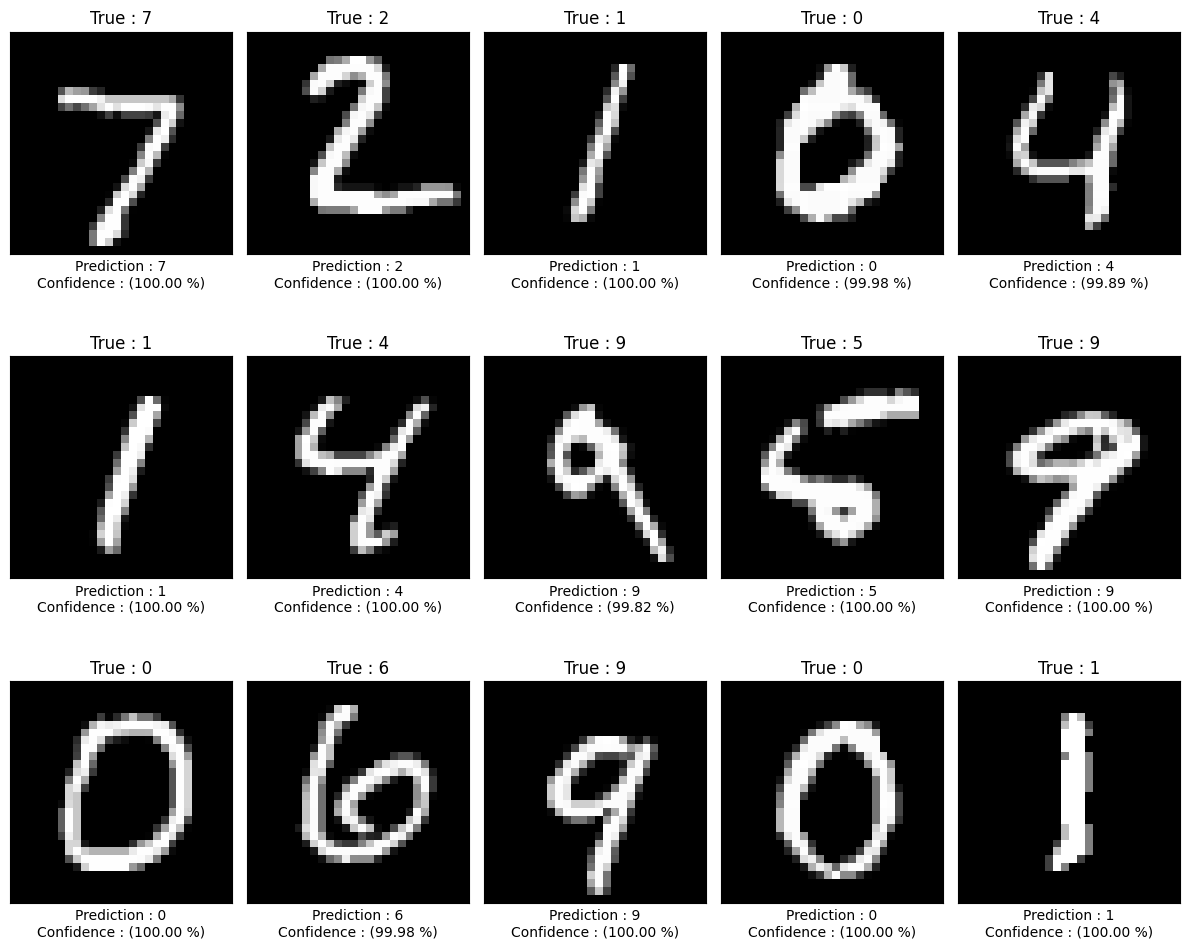

In [53]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True : {y_true}')
  ax.set_xlabel(f'Prediction : {y_pred}\nConfidence : ({confidence:.2f} %)')
plt.tight_layout()
plt.show()